In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# Load the train dataset
df = pd.read_csv('/content/drive/MyDrive/real data v1/combined_train_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183592 entries, 0 to 183591
Columns: 106 entries, time to label
dtypes: float64(105), object(1)
memory usage: 148.5+ MB


In [39]:
df.head()

,time,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,P44,P45,P46,P47,P48,P49,P50,P51,P52,label
0,13.64150,9.848858,8.944272,9.848858,9.848858,8.944272,9.433981,9.433981,10.295630,10.295630,...,0.380506,0.358771,0.380506,0.358771,0.358771,0.358771,0.412410,0.358771,0.358771,wave
1,12.95880,10.440307,10.198039,10.198039,11.180340,11.180340,11.045361,12.041595,12.041595,12.165525,...,0.066568,0.071307,0.000000,0.141897,0.071307,0.141897,0.141897,0.141897,0.141897,wave
2,8.34251,9.433981,10.000000,9.899495,11.401754,11.401754,12.041595,11.313708,12.041595,12.206556,...,2.356194,2.356194,2.279423,2.284887,2.245537,2.356194,2.319174,2.253113,2.390664,wave
3,13.88300,22.203603,25.179357,23.000000,24.020824,23.194827,23.345235,22.561028,21.377558,20.880613,...,-2.953371,-2.999696,-2.984991,-2.999696,-2.907849,-2.850136,-2.819842,-2.863293,-2.918116,push
4,8.75806,13.038405,12.041595,11.000000,12.041595,13.341664,14.035669,12.649111,13.341664,14.317821,...,-1.670465,-1.670465,-1.719686,-1.759018,-1.727398,-1.675673,-1.712693,-1.620755,-1.719686,wave


In [40]:
# The first column is the time, we won't use it as a feature as it is common for all data and the last column is the label
X = df.iloc[:, 1:-1].values # All rows, all columns
y = df.iloc[:, -1].values # Labels

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train = X

In [41]:
# Load the test dataset
df_test = pd.read_csv('/content/drive/MyDrive/real data v1/combined_test_data.csv')

# The first column is the time, we won't use it as a feature as it is common for all data and the last column is the label
X = df_test.iloc[:, 1:-1].values # All rows, all columns
y = df_test.iloc[:, -1].values # Labels

# Preprocess the data for amplitude
label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_test = X

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder

# Step 4: Reshape Data
num_time_steps = 1  # Since each row represents a single time step
num_features_per_time_step = X.shape[1]
X_train = X_train.reshape(X_train.shape[0], num_time_steps, num_features_per_time_step)
X_test = X_test.reshape(X_test.shape[0], num_time_steps, num_features_per_time_step)

# Step 5: Build LSTM Model
model = Sequential()
model.add(LSTM(units=64, input_shape=(num_time_steps, num_features_per_time_step)))
model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))  # Output layer with softmax activation for multi-class classification

# Step 6: Compile the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 7: Train the Model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Step 8: Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test)

# Get the model predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute precision
precision = precision_score(y_test, y_pred_classes, average='weighted')
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)
print('Test Precision:', precision)

Epoch 1/50
5738/5738 [==============================] - 35s 6ms/step - loss: 0.9425 - accuracy: 0.5816 - val_loss: 0.8037 - val_accuracy: 0.6530
Epoch 2/50
5738/5738 [==============================] - 24s 4ms/step - loss: 0.7419 - accuracy: 0.6863 - val_loss: 0.7029 - val_accuracy: 0.7070
Epoch 3/50
5738/5738 [==============================] - 25s 4ms/step - loss: 0.6676 - accuracy: 0.7233 - val_loss: 0.6498 - val_accuracy: 0.7307
Epoch 4/50
5738/5738 [==============================] - 26s 4ms/step - loss: 0.6217 - accuracy: 0.7460 - val_loss: 0.6196 - val_accuracy: 0.7463
Epoch 5/50
5738/5738 [==============================] - 27s 5ms/step - loss: 0.5911 - accuracy: 0.7587 - val_loss: 0.5974 - val_accuracy: 0.7566
Epoch 6/50
5738/5738 [==============================] - 27s 5ms/step - loss: 0.5672 - accuracy: 0.7699 - val_loss: 0.5747 - val_accuracy: 0.7665
Epoch 7/50
5738/5738 [==============================] - 24s 4ms/step - loss: 0.5495 - accuracy: 0.7782 - val_loss: 0.5605 - val_ac

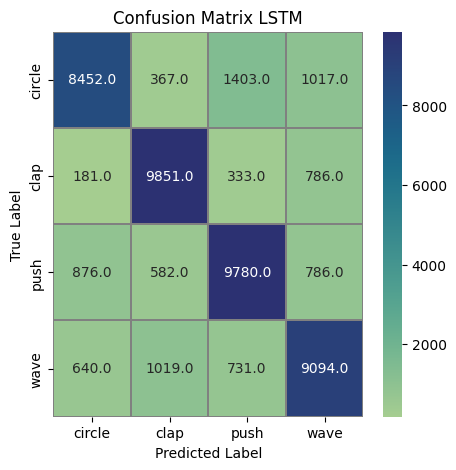

In [43]:
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_test, np.argmax(y_pred, axis=1))

# Decoding the labels in y_test for axis ticks if necessary
tick_labels = label_encoder.inverse_transform(sorted(set(y_test)))  # Use this line if using LabelEncoder

# Plot the confusion matrix
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap='crest', linecolor="gray", fmt='.1f', ax=ax) #sns.cubehelix_palette(as_cmap=True)
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title(f"Confusion Matrix LSTM")
ax.set_xticklabels(tick_labels)  # Set the tick labels on x-axis
ax.set_yticklabels(tick_labels)  # Set the tick labels on y-axis

plt.show()

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Convert ensemble predictions to class labels
predicted_labels = np.argmax(y_pred, axis=1)

# Calculate accuracy for LSTM model
accuracy = accuracy_score(y_test, predicted_labels)

# Calculate precision for LSTM model
precision = precision_score(y_test, predicted_labels, average='weighted')

# Calculate recall for LSTM model
recall = recall_score(y_test, predicted_labels, average='weighted')

f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print("LSTM model performance on the test data:")
print(f'Test accuracy: {accuracy:.4f}')
print(f'Test precision: {precision:.4f}')
print(f'Test recall: {recall:.4f}')
print(f'Test f1_Score:{f1_score:.4f}')

LSTM model performance on the test data:
Test accuracy: 0.8100
Test precision: 0.8104
Test recall: 0.8100
Test f1_Score:0.8102


In [45]:
from sklearn.metrics import classification_report

# Calculate classification report
report = classification_report(y_test, predicted_labels, digits=4)

# Print the report
print(report)

              precision    recall  f1-score   support

           0     0.8328    0.7520    0.7903     11239
           1     0.8335    0.8834    0.8577     11151
           2     0.7986    0.8134    0.8059     12024
           3     0.7784    0.7919    0.7851     11484

    accuracy                         0.8100     45898
   macro avg     0.8108    0.8102    0.8098     45898
weighted avg     0.8104    0.8100    0.8095     45898



In [46]:
def class_specific_accuracy(y_true, y_pred, class_label):
    cm = confusion_matrix(y_true, y_pred)
    class_idx = list(set(y_true))  # Get list of classes
    class_idx.sort()  # Sort classes to ensure correct indexing
    true_positives = cm[class_idx.index(class_label), class_idx.index(class_label)]
    total = np.sum(cm[:, class_idx.index(class_label)])

    return true_positives / total if total > 0 else 0

classes = np.unique(y_test)
acc=[]
for cls in classes:
  acc.append(class_specific_accuracy(y_test, predicted_labels, cls))

In [47]:
print(acc)

[0.8327914080204947, 0.83348845079956, 0.7985629133665387, 0.7783959599417958]


#Test on Fixed points

In [48]:
# Load the train dataset
df1 = pd.read_csv('/content/drive/MyDrive/real data v1/fixed_point_data.csv')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216957 entries, 0 to 216956
Columns: 106 entries, time to label
dtypes: float64(105), object(1)
memory usage: 175.5+ MB


In [49]:
df1.shape

(216957, 106)

In [50]:
# The first column is the time, we won't use it as a feature as it is common for all data and the last column is the label
X = df1.iloc[:, 1:53].values # All rows, all columns
y = df1.iloc[:, -1].values # Labels

label_encoder = LabelEncoder()
y= label_encoder.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X_train.shape

(173565, 52)

In [52]:
# Step 4: Reshape Data
num_time_steps = 1  # Since each row represents a single time step
num_features_per_time_step = X.shape[1]
X_train = X_train.reshape(X_train.shape[0], num_time_steps, num_features_per_time_step)
X_test = X_test.reshape(X_test.shape[0], num_time_steps, num_features_per_time_step)

# Step 5: Build LSTM Model
model = Sequential()
model.add(LSTM(units=64, input_shape=(num_time_steps, num_features_per_time_step)))
model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))  # Output layer with softmax activation for multi-class classification

# Step 6: Compile the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 7: Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Step 8: Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test)

# Get the model predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

Epoch 1/50
5424/5424 [==============================] - 31s 5ms/step - loss: 0.9098 - accuracy: 0.5980 - val_loss: 0.7625 - val_accuracy: 0.6653
Epoch 2/50
5424/5424 [==============================] - 26s 5ms/step - loss: 0.7010 - accuracy: 0.6999 - val_loss: 0.6624 - val_accuracy: 0.7223
Epoch 3/50
5424/5424 [==============================] - 23s 4ms/step - loss: 0.6357 - accuracy: 0.7330 - val_loss: 0.6201 - val_accuracy: 0.7432
Epoch 4/50
5424/5424 [==============================] - 24s 4ms/step - loss: 0.5955 - accuracy: 0.7539 - val_loss: 0.5897 - val_accuracy: 0.7601
Epoch 5/50
5424/5424 [==============================] - 27s 5ms/step - loss: 0.5687 - accuracy: 0.7672 - val_loss: 0.5636 - val_accuracy: 0.7717
Epoch 6/50
5424/5424 [==============================] - 23s 4ms/step - loss: 0.5496 - accuracy: 0.7763 - val_loss: 0.5565 - val_accuracy: 0.7755
Epoch 7/50
5424/5424 [==============================] - 24s 4ms/step - loss: 0.5334 - accuracy: 0.7843 - val_loss: 0.5436 - val_ac

In [53]:
precision = precision_score(y_test, y_pred_classes, average='weighted')
print("LSTM Result Fixed points only")
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)
print('Test Precision:', precision)

LSTM Result Fixed points only
Test Accuracy: 0.8179848790168762
Test Loss: 0.46856310963630676
Test Precision: 0.8183854419433441


In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Convert ensemble predictions to class labels
predicted_labels = np.argmax(y_pred, axis=1)

# Calculate accuracy for LSTM model
accuracy = accuracy_score(y_test, predicted_labels)

# Calculate precision for LSTM model
precision = precision_score(y_test, predicted_labels, average='weighted')

# Calculate recall for LSTM model
recall = recall_score(y_test, predicted_labels, average='weighted')

f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print("LSTM model performance on the test data: (Fixed Points)")
print(f'Test accuracy: {accuracy:.4f}')
print(f'Test precision: {precision:.4f}')
print(f'Test recall: {recall:.4f}')
print(f'Test f1_Score:{f1_score:.4f}')

LSTM model performance on the test data: (Fixed Points)
Test accuracy: 0.8180
Test precision: 0.8184
Test recall: 0.8180
Test f1_Score:0.8182


In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                29952     
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 30212 (118.02 KB)
Trainable params: 30212 (118.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
!pip install pydot graphviz

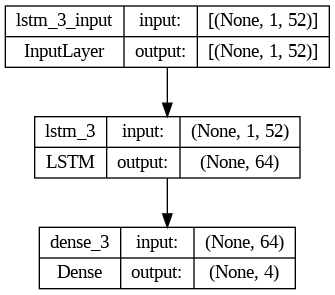

In [57]:
from keras.utils import plot_model

# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

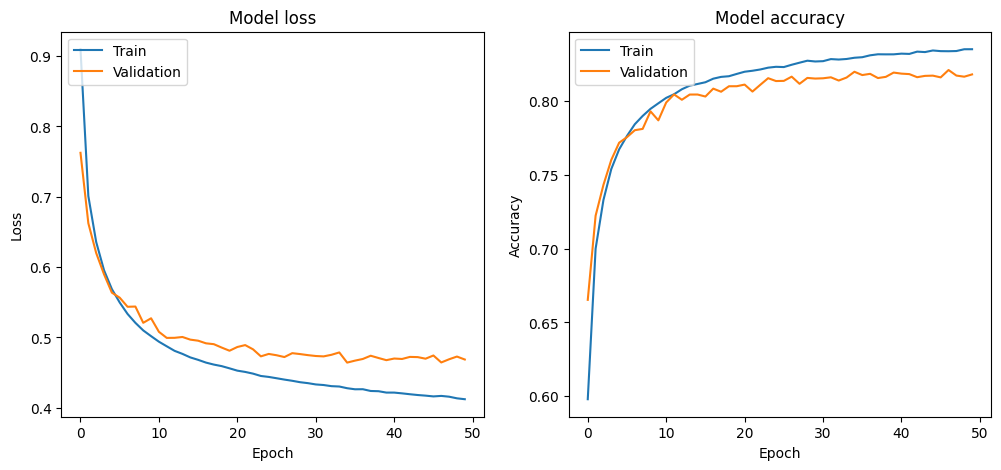

In [58]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


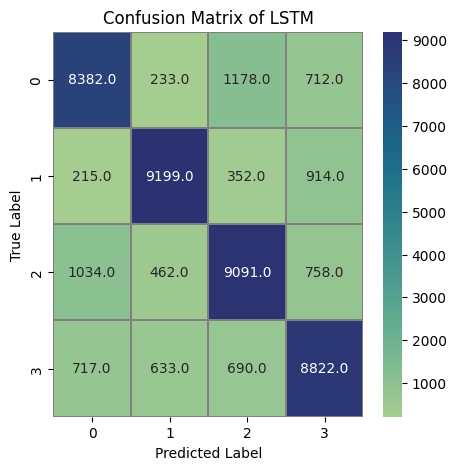

In [59]:
Y_pred = y_pred
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
# Y_true = np.argmax(y_test, axis = 1)
Y_true=y_test
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap= 'crest',linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of LSTM")
plt.show()